# Primer Examen 15%

A) Cargando el archivo JSON: 
* https://github.com/restrepo/anomaly/raw/main/solutions.json.gz

en Pandas

1) Adicione una columna nueva `'smax'` con el valor máximo en valor absoluto de la lista de enteros de la correspondiente entrada en la columna '`solution`'
2) Adicione dos columnas nuevas: `'sum_s'` (`sum_s³`) con el resultado de la suma (al cubo) de todos los números de la lista de enteros de la correspondiente entrada en la columna '`solution`'
3) Usando como semilla el número de su cédula, genere un número entero de forma aleatoria entre 0 y 390073. Seleccione el la fila correspondiente a ese número entero y construya un polinomio con esos coeficientes. Encuentre las raices reales de ese polinomio y realice el correspondiente gráfico incluyendo: el polinomio generado, sus raices (como puntos en gráfico) y la derivada del polinomio. Optimize el rango de valores en el eje $x$ y en el eje $y$ del gráfico, de manera que el polinomio y sus raices se visualicen de la mejor forma posible. (Sugerencia → use: `plt.ylim(ymin,ymax)` ). Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo


B)

I) Usando como semilla el número de su cédula, genere de forma aletoria un número entero entre 1 y 5

II) De acuerdo al entero obtenido, escoja una de las siguientes cinco funciones 
1. $$x\operatorname{e}^x=p\,, $$
2. $$\frac{\sin x}{x}=+p\,,$$
3. $$\frac{\sin x}{x}=-p\,,$$
4. $$\frac{\cos x}{x}=+p\,,$$
5. $$\frac{\cos x}{x}=-p\,,$$
III) Genere un número aleatorio entre 0 y 1 y asignelo al valor de $p$
IV) Encuentre la solución a la ecuación trascendental para el intervalo $x$ entre -10 y 10 y gráfique la correspondiente función trascendental y las correspondientes soluciones. . Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo.

A modo de nota curiosa: estas ecuaciones trascendentales están asociadas a soluciones de la ecuación de Schödinger en mecánica cuántica: https://doi.org/10.1080/14786435.2015.1081425

In [1]:
#LIBRERIAS
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from scipy import optimize

In [2]:
#cargar el link con json
df = pd.read_json('https://github.com/restrepo/anomaly/raw/main/solutions.json.gz')
df

,l,k,solution,gcd,n
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11
...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8


1) Adicione una columna nueva 'smax' con el valor máximo en valor absoluto de la lista de enteros de la correspondiente entrada en la columna 'solution'



In [18]:
df['smax']=df['solution'].apply(lambda z: max(map(abs,z)))
df

,l,k,solution,gcd,n,smax
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8
...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,32
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31


2) Adicione dos columnas nuevas: 'sum_s' (sum_s³) con el resultado de la suma (al cubo) de todos los números de la lista de enteros de la correspondiente entrada en la columna 'solution' 

In [28]:
df['sum_s']=df['solution'].apply(lambda z: sum(z))#suma
df['sum_s**3']=df['solution'].apply(lambda h: (sum(h))**3)#suma al cubo
df

,l,k,solution,gcd,n,smax,sum_s,sum_s**3
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6,0,0
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4,0,0
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6,0,0
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7,0,0
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8,0,0
...,...,...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32,0,0
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28,0,0
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,32,0,0
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31,0,0


3) Usando como semilla el número de su cédula, genere un número entero de forma aleatoria entre 0 y 390073. Seleccione el la fila correspondiente a ese número entero y construya un polinomio con esos coeficientes. Encuentre las raices reales de ese polinomio y realice el correspondiente gráfico incluyendo: el polinomio generado, sus raices (como puntos en gráfico) y la derivada del polinomio. Optimize el rango de valores en el eje  x  y en el eje  y  del gráfico, de manera que el polinomio y sus raices se visualicen de la mejor forma posible. (Sugerencia → use: plt.ylim(ymin,ymax) ). Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo

In [83]:
alea= np.random.seed(1004922490)
alea3= np.random.randint(0, 390073)
print("se usa la fila: ", alea3)

se usa la fila:  7458


In [97]:
#se toman los coeficientes de solution con el numero random de la semilla
coeficientes= df.loc[alea3]['solution']
# se genera un polinomio con estas raices
polinomio= np.poly1d(coeficientes)
# se hallan las raices del polinomio
raiz= np.roots(polinomio)
raizreal= raiz[raiz.imag==0].real
#derivada del polinomio
deriv=polinomio.deriv()
print(raizreal)

[1.28771235 1.         0.70458132]


No handles with labels found to put in legend.


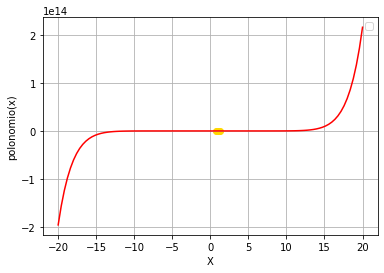

In [107]:
x=np.linspace(-20,20,100)
#grafica
plt.plot(x,polinomio(x), color='red')#,label='$f(x)=(sinx/x)+0.9493927744985019$')
plt.scatter(raizreal,polinomio(raizreal), color='gold')#,label='$f(x)=(sinx/x)+0.9493927744985019$')
plt.ylabel('polonomio(x)')
plt.xlabel('X')
plt.legend()
plt.grid()
#plt.xlim(-5,5)
#plt.ylim(-1,1)
#plt.set(xlim=(-5,5),ylim=(-1,1))
plt.show()

No handles with labels found to put in legend.


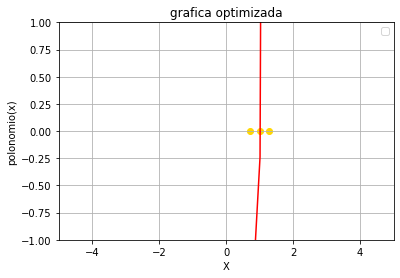

In [109]:
plt.title("grafica optimizada")
x=np.linspace(-20,20,100)
#grafica
plt.plot(x,polinomio(x), color='red')#,label='$f(x)=(sinx/x)+0.9493927744985019$')
plt.scatter(raizreal,polinomio(raizreal), color='gold')#,label='$f(x)=(sinx/x)+0.9493927744985019$')
plt.ylabel('polonomio(x)')
plt.xlabel('X')
plt.legend()
plt.grid()
plt.xlim(-5,5)
plt.ylim(-1,1)
#plt.set(xlim=(-5,5),ylim=(-1,1))
plt.show()

B)

I) Usando como semilla el número de su cédula, genere de forma aletoria un número entero entre 1 y 5

In [80]:
alea= np.random.seed(1004922490)
alea2= np.random.randint(1,6)
alea2

3

II) De acuerdo al entero obtenido, escoja una de las siguientes cinco funciones
 
$sinx/x=−p$

In [59]:
p=np.random.random()
p

0.9493927744985019

III) Genere un número aleatorio entre 0 y 1 y asignelo al valor de  p 

$sinx/x=−0.9493927744985019$

 IV) Encuentre la solución a la ecuación trascendental para el intervalo  x  entre -10 y 10 y gráfique la correspondiente función trascendental y las correspondientes soluciones. . Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo.

In [60]:
#Funcion
f= lambda x: ((np.sin(x))/x)+(p)

In [79]:
#Secante
optimize.newton(f,-10, fprime=None, args=(), tol=1.48e-8, maxiter=50000, fprime2=None, x1=None, rtol=0.0, full_output=False, disp=True)

RuntimeError: ignored

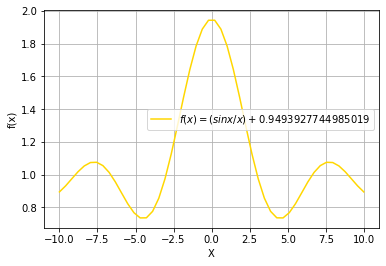

In [78]:
x = np.linspace(-10,10)
plt.plot(x,f(x), color='gold',label='$f(x)=(sinx/x)+0.9493927744985019$')
plt.ylabel('f(x)')
plt.xlabel('X')
plt.legend()
plt.grid()
plt.show()


Por el metodo de la secante se puede ver que la funcion no tiene raices en el intervalo de [-10,10], ademas en la grafica tampoco se evidencia que haya un cero.